In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Getting the training dataset
df = pd.read_csv('data/traindata.csv')

In [22]:
# Generating transformed variables
df['ln_hrlyearn'] = np.log(df['hrlyearn'])
df['age_12_sq'] = df['age_12'] ** 2
df['tenure_sq'] = df['tenure'] ** 2
df['educ_tenure'] = df['educ'] * df['tenure']
df['naics_noc'] = df['naics_21'] * df['noc_10']

# Create the formula string for regression
# Note: For categorical variables (i.prov and i.naics_21), we use C() in Python
formula = """ln_hrlyearn ~ age_12 + sex + marstat + educ + noc_10 + 
             uhrsmain + utothrs + hrsaway + unpaidot + xtrahrs + 
             tenure + estsize + firmsize + efamtype + 
             C(prov) + C(naics_21) + 
             age_12_sq + tenure_sq + educ_tenure + naics_noc"""

# Fit the regression model with robust standard errors
model = ols(formula, data=df).fit()
robust_results = model.get_robustcov_results(cov_type='HC1')

# Print summary of results
print(robust_results.summary())

# Alternative implementation using statsmodels directly
# This approach gives you more control over the model specification

# Create X matrix (predictors) and y vector (dependent variable)
y = df['ln_hrlyearn']

X = pd.concat([
    df[['age_12', 'sex', 'marstat', 'educ', 'noc_10', 
        'uhrsmain', 'utothrs', 'hrsaway', 'unpaidot', 'xtrahrs',
        'tenure', 'estsize', 'firmsize', 'efamtype',
        'age_12_sq', 'tenure_sq', 'educ_tenure', 'naics_noc']],
    pd.get_dummies(df['prov'], prefix='prov'),
    pd.get_dummies(df['naics_21'], prefix='naics')
], axis=1)

# Add constant term
X = sm.add_constant(X)

# Fit the model with robust standard errors
model2 = sm.OLS(y, X).fit(cov_type='HC1')

# Print summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            ln_hrlyearn   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     903.2
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:07:55   Log-Likelihood:                -12803.
No. Observations:               42092   AIC:                         2.570e+04
Df Residuals:                   42044   BIC:                         2.612e+04
Df Model:                          47                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9661      0.03

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [17]:
# Generate transformed variables
df['ln_hrlyearn'] = np.log(df['hrlyearn'])
df['age_12_sq'] = df['age_12'] ** 2
df['tenure_sq'] = df['tenure'] ** 2
df['educ_tenure'] = df['educ'] * df['tenure']
df['naics_noc'] = df['naics_21'] * df['noc_10']

# ============ Linear Regression ============
# Create the formula string for regression
formula = """ln_hrlyearn ~ age_12 + sex + marstat + educ + noc_10 + 
             uhrsmain + utothrs + hrsaway + unpaidot + xtrahrs + 
             tenure + estsize + firmsize + efamtype + 
             C(prov) + C(naics_21) + 
             age_12_sq + tenure_sq + educ_tenure + naics_noc"""

# Fit the regression model with robust standard errors
linear_model = ols(formula, data=df).fit()
robust_results = linear_model.get_robustcov_results(cov_type='HC1')

# Print linear regression summary
print("Linear Regression Results:")
print(robust_results.summary())

# ============ Gradient Boosting Model ============
# Prepare data for Gradient Boosting
X = pd.concat([
    df[['age_12', 'sex', 'marstat', 'educ', 'noc_10', 
        'uhrsmain', 'utothrs', 'hrsaway', 'unpaidot', 'xtrahrs',
        'tenure', 'estsize', 'firmsize', 'efamtype',
        'age_12_sq', 'tenure_sq', 'educ_tenure', 'naics_noc']],
    pd.get_dummies(df['prov'], prefix='prov'),
    pd.get_dummies(df['naics_21'], prefix='naics')
], axis=1)

y = df['ln_hrlyearn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_samples_split=5,
    random_state=42
)

# Fit the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Model Results:")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")



# Compare predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print("\nPrediction Sample:")
print(comparison_df.head())

Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:            ln_hrlyearn   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     903.2
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:56:39   Log-Likelihood:                -12803.
No. Observations:               42092   AIC:                         2.570e+04
Df Residuals:                   42044   BIC:                         2.612e+04
Df Model:                          47                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept  


Top 10 Most Important Features:
        feature  importance
4        noc_10    0.327959
3          educ    0.103468
16  educ_tenure    0.093338
17    naics_noc    0.085166
11      estsize    0.041922
1           sex    0.040641
12     firmsize    0.036395
8      unpaidot    0.023170
0        age_12    0.022113
14    age_12_sq    0.021358


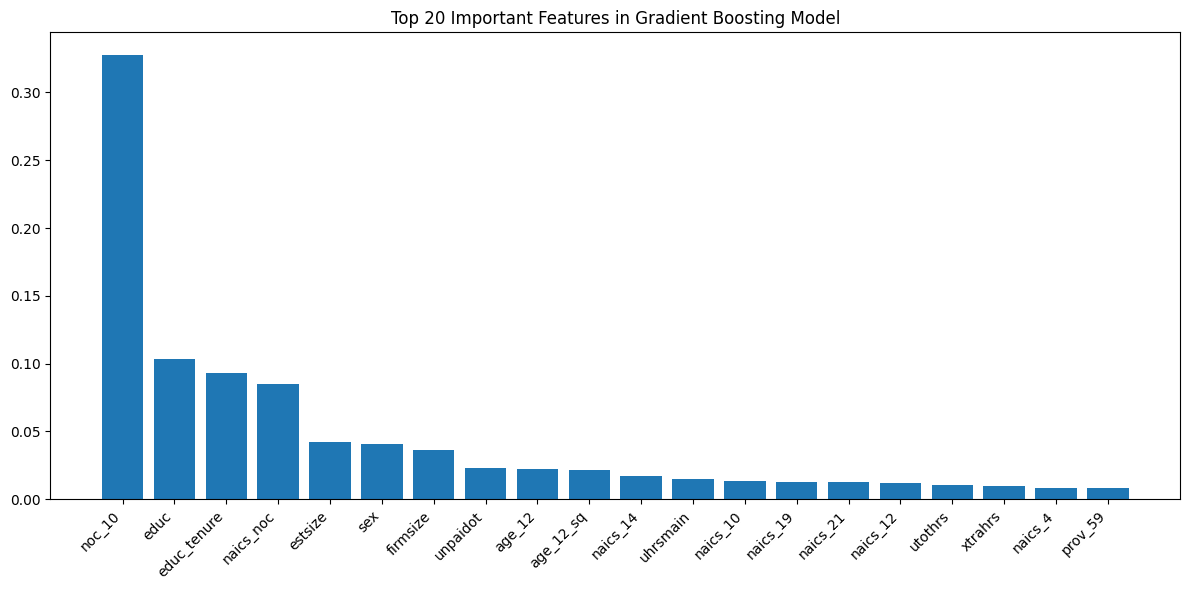

In [15]:
# Feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(20), importance_df['importance'][:20])
plt.xticks(range(20), importance_df['feature'][:20], rotation=45, ha='right')
plt.title('Top 20 Important Features in Gradient Boosting Model')
plt.tight_layout()

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

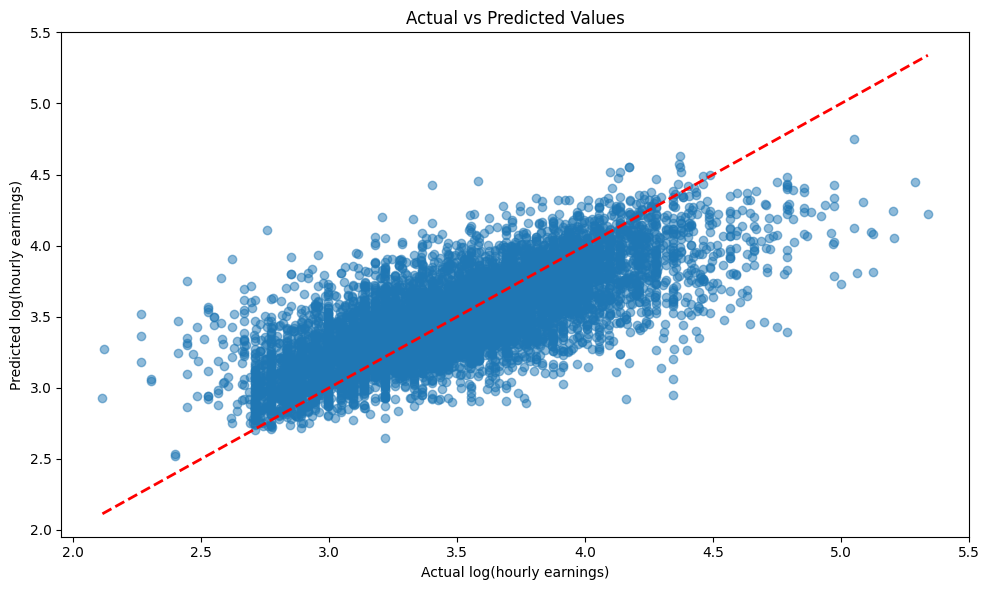

In [16]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual log(hourly earnings)')
plt.ylabel('Predicted log(hourly earnings)')
plt.title('Actual vs Predicted Values')
plt.tight_layout()

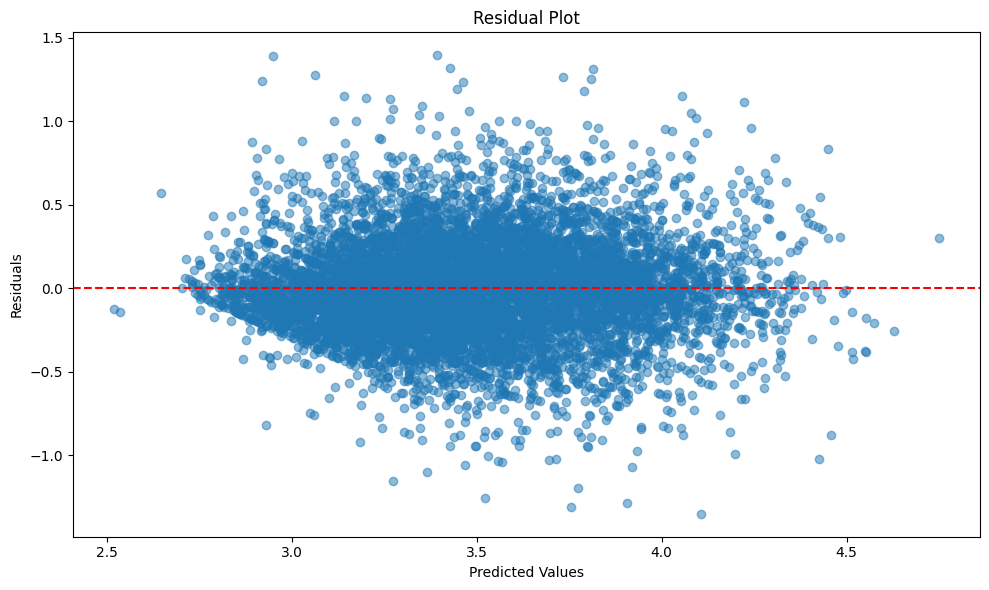

In [18]:
# Residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()

In [20]:
# Load evaluation data
eval_df = pd.read_csv('data/evaldata.csv')

# Generate the same transformed variables as in training
eval_df['age_12_sq'] = eval_df['age_12'] ** 2
eval_df['tenure_sq'] = eval_df['tenure'] ** 2
eval_df['educ_tenure'] = eval_df['educ'] * eval_df['tenure']
eval_df['naics_noc'] = eval_df['naics_21'] * eval_df['noc_10']

# Prepare features in the same order as training data
X_eval = pd.concat([
    eval_df[['age_12', 'sex', 'marstat', 'educ', 'noc_10', 
             'uhrsmain', 'utothrs', 'hrsaway', 'unpaidot', 'xtrahrs',
             'tenure', 'estsize', 'firmsize', 'efamtype',
             'age_12_sq', 'tenure_sq', 'educ_tenure', 'naics_noc']],
    pd.get_dummies(eval_df['prov'], prefix='prov'),
    pd.get_dummies(eval_df['naics_21'], prefix='naics')
], axis=1)

# Ensure X_eval has the same columns as training data
missing_cols = set(X.columns) - set(X_eval.columns)
for col in missing_cols:
    X_eval[col] = 0
X_eval = X_eval[X.columns]

# Make predictions
log_predictions = gb_model.predict(X_eval)

# Transform predictions back from log scale
predictions = np.exp(log_predictions)

# Create submission dataframe
submission = pd.DataFrame({
    'rec_num': eval_df['rec_num'],
    'phrlyearn': predictions
})

# Save submission file
submission.to_csv('data/LogicGood.csv', index=False)

# Display first few predictions
print("First few predictions:")
print(submission.head())

# Display summary statistics of predictions
print("\nPrediction Summary Statistics:")
print(submission['phrlyearn'].describe())

First few predictions:
   rec_num  phrlyearn
0   111285  19.119754
1   111288  26.269094
2   111292  16.732153
3   111295  30.843221
4   111299  61.957280

Prediction Summary Statistics:
count    43678.000000
mean        34.697636
std         12.064348
min         12.038563
25%         25.896161
50%         32.084142
75%         41.072800
max        119.013119
Name: phrlyearn, dtype: float64
